# Simulate binary and catepillar tree

Mamie Wang 05/11/20

Goal: 

- Additional test of the spectral tree method on two simulated datasets
- plot the influenza tree as an example
- organize the result from influenza tree

In [1]:
import sys, os

sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'../spectral-tree-inference/spectraltree'))

import numpy as np
import utils
import generation
import reconstruct_tree
import dendropy
import scipy
import time
from itertools import product
import matplotlib.pyplot as plt

from dendropy.model.discrete import simulate_discrete_chars, Jc69, Hky85
from dendropy.calculate.treecompare import symmetric_difference

In [121]:
m = 4
binary_tree = utils.balanced_binary(m, edge_length = 0.5)
data_HKY = simulate_discrete_chars(100000, binary_tree, Hky85(kappa = 1), mutation_rate=0.1)

In [136]:
binary_tree.print_plot()

                                      /-------------------------------------- 0
/-------------------------------------+                                        
|                                     \-------------------------------------- 1
+                                                                              
|                                     /-------------------------------------- 2
\-------------------------------------+                                        
                                      \-------------------------------------- 3
                                                                               
                                                                               


In [122]:
ch_list = list()
for t in data_HKY.taxon_namespace:
    ch_list.append([x.symbol for x in data_HKY[t]])
ch_arr = np.array(ch_list)

In [129]:
seq_1_is_A = ch_arr[0,:] == 'A'
seq_2_given_A = ch_arr[2,:][seq_1_is_A]

In [130]:
np.mean(seq_2_given_A == "C")

0.06049807815502883

In [131]:
seq_1_is_C = ch_arr[0,:] == 'C'
seq_2_given_C = ch_arr[2,:][seq_1_is_C]

In [132]:
np.mean(seq_2_given_C == "A")

0.06283433133732536

In [137]:
seq_1_is_A = ch_arr[0,:] == 'A'
seq_2_given_A = ch_arr[2,:][seq_1_is_A]

In [138]:
np.mean(seq_2_given_A == "G")

0.06005765534913517

## Binary tree


A complete binary tree of 512 terminal nodes and n=1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [3]:
m = 1024
n = 1000

binary_tree = utils.balanced_binary(m)

binary_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/binary_tree_1024.newick',
                     schema = "newick")

In [2]:
# results from the catepillar tree
import pandas as pd
perf_metrics = pd.read_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/script/binary_angle.csv")
perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
has_threshold = perf_metrics.threshold != "None"
perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " " + perf_metrics.loc[has_threshold,'threshold']
perf_summarized = perf_metrics.groupby("method").agg(['mean', 'std']).round(2).sort_values([('F1', 'mean')], ascending=False)
perf_summarized

runtime           RF             F1      
                     mean   std   mean    std    mean   std
method                                                     
raxml              811.07  9.70    0.0   0.00  100.00  0.00
raxml sp deep 256  764.20  8.48    5.4   2.60   99.74  0.13
nj sp deep 64       58.94  1.93    5.8   1.82   99.72  0.09
nj sp deep 128      59.44  1.14    5.9   2.94   99.71  0.14
raxml sp deep 64   354.13  2.17    6.4   2.21   99.69  0.11
raxml sp deep 128  599.65  7.84    6.8   3.81   99.67  0.19
nj sp deep 256      63.02  0.40    7.0   2.55   99.66  0.12
nj                  80.44  0.76   32.7  15.90   98.40  0.78
snj                 82.41  0.64  292.9  24.68   85.67  1.21

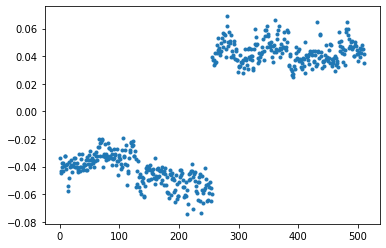

In [171]:
# plot the second eigenvector of the binary tree
tree_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/binary_tree.newick"
binary_tree = dendropy.Tree.get(path=tree_path, schema="newick")
data_HKY = simulate_discrete_chars(1000, binary_tree, Hky85(kappa = 2), mutation_rate=0.1)

ch_list = list()
for t in data_HKY.taxon_namespace:
    ch_list.append([x.symbol for x in data_HKY[t]])
ch_arr = np.array(ch_list)

HKY_sim = reconstruct_tree.HKY_similarity_matrix(ch_arr)

# compute the second eigenvector of the similarity matrix and plot it
w, v = np.linalg.eigh(HKY_sim)

plt.plot(v[:,-2], ".")
plt.savefig("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/2nd_eigvec_binary.eps")

## Catepillar tree

A caterpillar tree with m=128 terminal nodes and 1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [3]:
m = 128
n = 1000
catepillar_tree = utils.lopsided_tree(m, edge_length = 1)

In [4]:
catepillar_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar.newick',
                     schema = "newick")

In [3]:
m = 32
n = 1000
catepillar_tree = utils.lopsided_tree(m, edge_length = 1)
catepillar_tree.write(path='/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar_32_leaves.newick',
                     schema = "newick")

In [1]:
# results from the catepillar tree
import pandas as pd
perf_metrics = pd.read_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/script/catepillar_angle.csv")
perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
has_threshold = perf_metrics.threshold != "None"
perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " " + perf_metrics.loc[has_threshold,'threshold']
perf_summarized = perf_metrics.groupby("method").agg(['mean', 'std']).round(2).sort_values([('F1', 'mean')], ascending=False)
perf_summarized

runtime            RF            F1       
                    mean    std   mean    std   mean    std
method                                                     
raxml sp deep 32   33.79   2.08   42.8  53.62  91.57  10.56
raxml sp deep 16   18.86   1.72   49.7  57.38  90.22  11.29
nj sp deep 16       3.42   0.04   51.1  59.09  89.94  11.63
raxml sp deep 64   42.57   2.14   54.7  69.14  89.23  13.61
nj sp deep 32       3.38   0.03   80.4  81.93  84.17  16.13
raxml              56.51  10.30  103.7  81.96  79.59  16.13
nj sp deep 64       3.36   0.04  124.6  55.86  75.47  11.00
snj                 4.02   0.07  227.3   3.26  55.26   0.64
nj                  3.54   0.02  231.1  23.58  54.51   4.64

In [162]:
# plot the second eigenvector of the binary tree
m = 32
n = 2000
catepillar_tree = utils.lopsided_tree(m, edge_length = 1)
data_HKY = simulate_discrete_chars(n, catepillar_tree, Hky85(kappa = 2), mutation_rate=0.05) # Jc69(),
ch_list = list()
for t in data_HKY.taxon_namespace:
    ch_list.append([x.symbol for x in data_HKY[t]])
ch_arr = np.array(ch_list)

HKY_sim = reconstruct_tree.HKY_similarity_matrix(ch_arr)

# compute the second eigenvector of the similarity matrix and plot it
w, v = np.linalg.eigh(HKY_sim)

In [163]:
import matplotlib.pyplot as plt

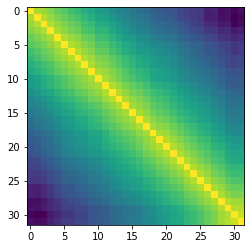

In [164]:
plt.imshow(HKY_sim)

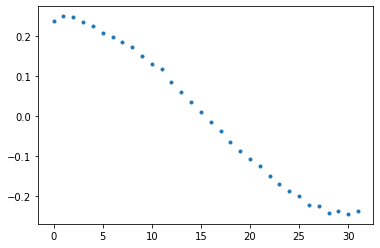

In [166]:
plt.plot(v[:,-2], ".")
plt.savefig("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/2nd_eigvec_catepillar.eps")

## H3N2 tree

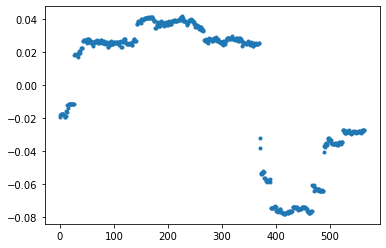

In [34]:
# plot the second eigenvector of the binary tree
tree_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/NY_H3N2.newick"
H3N2_tree = dendropy.Tree.get(path=tree_path, schema="newick")
data_HKY = simulate_discrete_chars(1000, H3N2_tree, Hky85(kappa = 2), mutation_rate=0.1)

ch_list = list()
for t in data_HKY.taxon_namespace:
    ch_list.append([x.symbol for x in data_HKY[t]])
ch_arr = np.array(ch_list)

HKY_sim = reconstruct_tree.HKY_similarity_matrix(ch_arr)

# compute the second eigenvector of the similarity matrix and plot it
w, v = np.linalg.eigh(HKY_sim)

plt.plot(v[:,-2], ".")
plt.savefig("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/2nd_eigvec_H3N2.eps")

## H1N1 tree

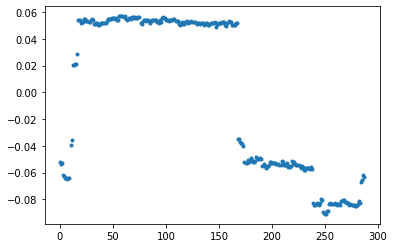

In [3]:
# plot the second eigenvector of the binary tree
tree_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/data/H1N1_NY_Skygrid_cutoff6.newick"
H1N1_tree = dendropy.Tree.get(path=tree_path, schema="newick")
data_HKY = simulate_discrete_chars(1000, H1N1_tree, Hky85(kappa = 2), mutation_rate=0.1)

ch_list = list()
for t in data_HKY.taxon_namespace:
    ch_list.append([x.symbol for x in data_HKY[t]])
ch_arr = np.array(ch_list)

HKY_sim = reconstruct_tree.HKY_similarity_matrix(ch_arr)

# compute the second eigenvector of the similarity matrix and plot it
w, v = np.linalg.eigh(HKY_sim)

plt.plot(v[:,-2], ".")
plt.savefig("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/2nd_eigvec_H1N1.eps")

In [8]:
# results from the H1N1 tree
import pandas as pd
perf_metrics = pd.read_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/script/h1n1_angle.csv")
perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
has_threshold = perf_metrics.threshold != "None"
perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " " + perf_metrics.loc[has_threshold,'threshold']
perf_summarized = perf_metrics.groupby("method").agg(['mean', 'std']).round(2).sort_values([('F1', 'mean')], ascending=False)
perf_summarized

runtime           RF            F1      
                     mean   std   mean    std   mean   std
method                                                    
raxml              175.71  6.64   40.2   6.49  96.50  0.57
raxml sp deep 64    53.68  1.34   40.4   5.06  96.48  0.44
raxml sp deep 128   89.19  2.63   46.4   5.95  95.96  0.52
nj sp deep 256      17.72  0.05   51.6  11.03  95.51  0.96
nj sp deep 128      17.30  0.06   52.6   4.43  95.42  0.39
nj sp deep 64       17.36  0.09   54.4  11.99  95.26  1.04
nj                  20.76  0.05   65.0  10.51  94.34  0.92
nj sp deep 35       17.58  0.23   66.4   8.98  94.22  0.78
snj                 22.61  0.33  232.4  12.61  79.76  1.10

## Plot the trees

In [1]:
library(ape)

In [2]:
H3N2_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/NY_H3N2.newick"
H1N1_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/data/H1N1_NY_Skygrid_cutoff6.newick"
catepillar_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/catepillar_32_leaves.newick"
binary_tree_path = '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/binary_tree.newick'

In [4]:
H3N2_tree = read.tree(H3N2_path)
H1N1_tree = read.tree(H1N1_path)
catepillar_tree = read.tree(catepillar_path)
binary_tree = read.tree(binary_tree_path)


png 
  2

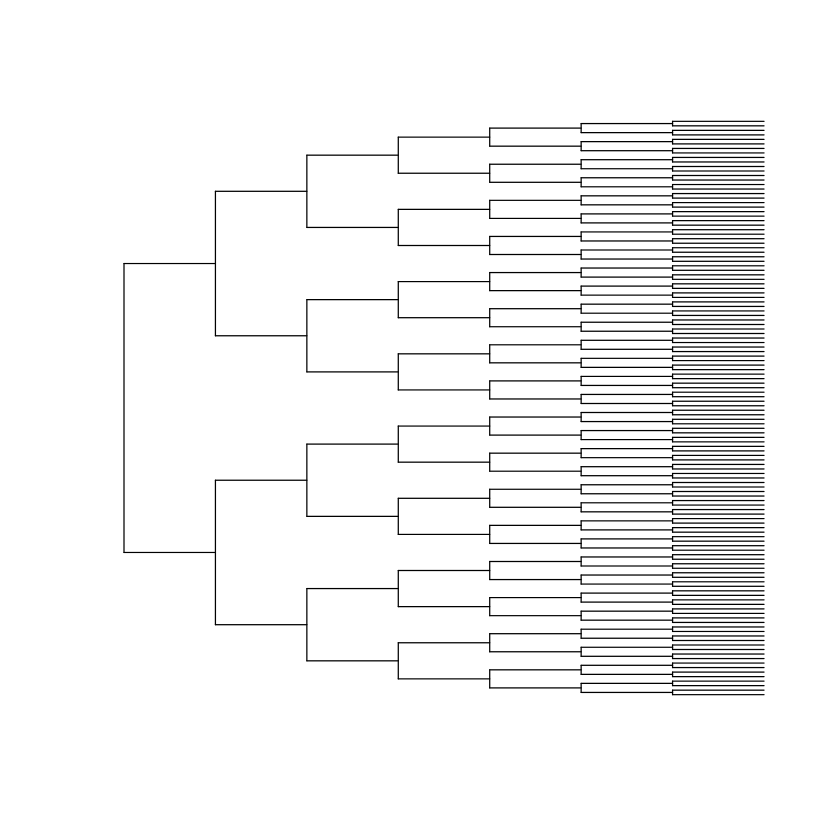

In [5]:
plot(ladderize(binary_tree), show.tip.label = F,  use.edge.length = T)

svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/binary_tree.svg")
plot(ladderize(binary_tree), show.tip.label = F)
dev.off()

png 
  2

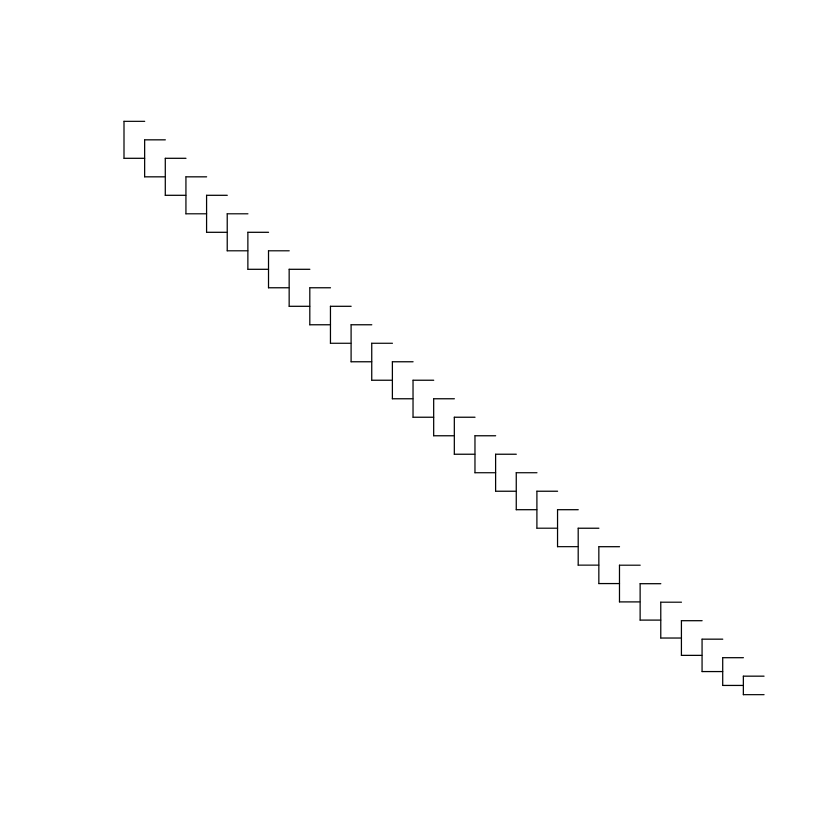

In [6]:
plot(catepillar_tree, show.tip.label = F,  use.edge.length = T)

svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/catepillar_tree.svg")
plot(ladderize(catepillar_tree), show.tip.label = F)
dev.off()

png 
  2

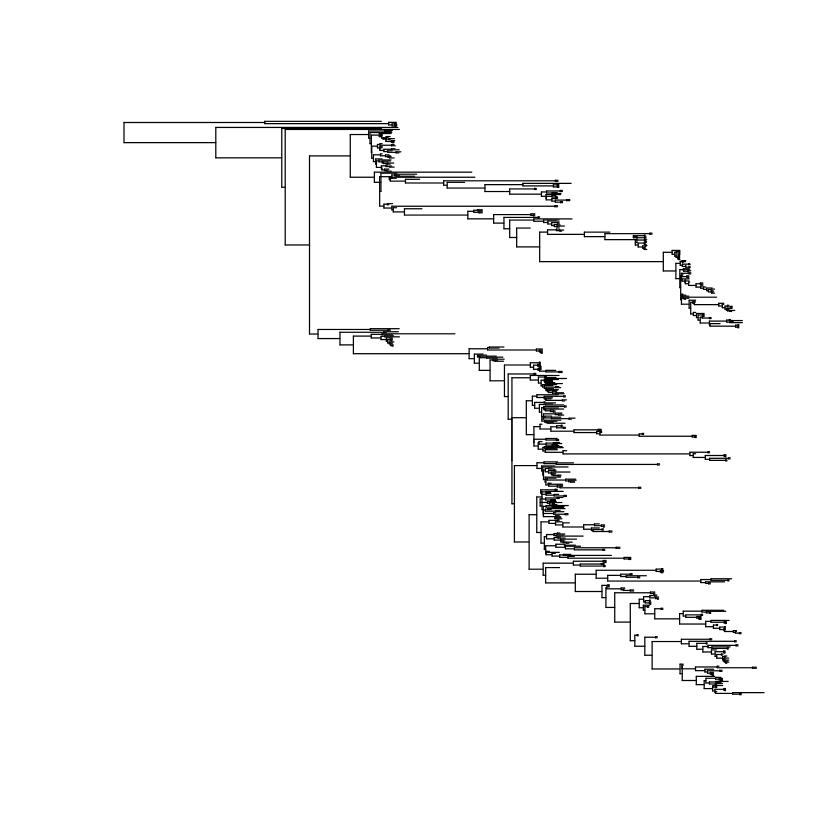

In [7]:
# plot the beast tree
plot(ladderize(H3N2_tree), show.tip.label = F)

# save the plot
svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/H3N2_tree.svg")
plot(ladderize(H3N2_tree), show.tip.label = F)
dev.off()

png 
  2

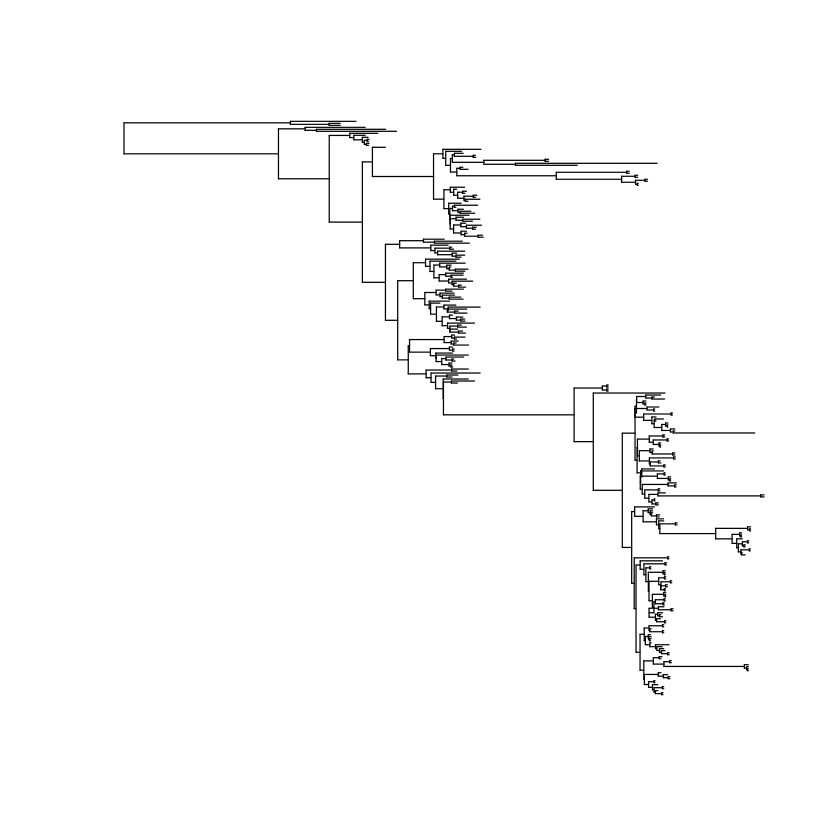

In [5]:
# plot the beast tree
plot(ladderize(H1N1_tree), show.tip.label = F)

# save the plot
svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/H1N1_tree.svg")
plot(ladderize(H1N1_tree), show.tip.label = F)
dev.off()